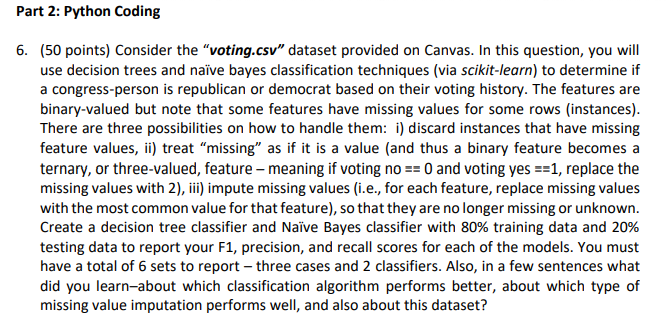

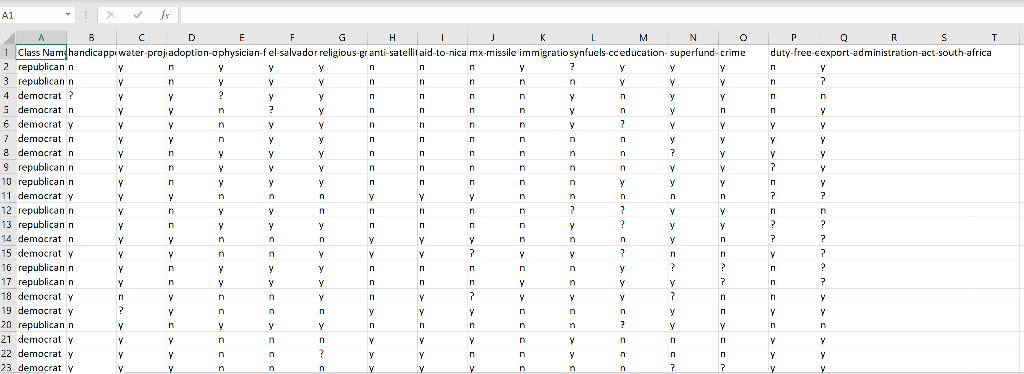

Here is the dataset link: https://archive.ics.uci.edu/ml/datasets/congressional+voting+records

## Importing the libraries

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [84]:
dataset = pd.read_csv('voting.csv',na_values="?")

## Handling Missing Data

In [85]:
#dataset.isnull().sum()
sum(dataset.isnull().sum(axis=1) <= 2)

399

Conclusion: We will use only rows which has less than three error.

In [86]:
#thresh takes the no of columns without na
dataset = dataset.dropna(axis=0,thresh=len(dataset.columns)-2)

### Setting the Dependent and Independent variable

In [87]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [88]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(X)
X = imputer.transform(X)

### Encoding categorical data
#### Encoding the dependent and Independent Variable

In [89]:
from sklearn.preprocessing import LabelEncoder

y_n = LabelEncoder()
for i in range(len(dataset.columns)-1):
  X[:,i] = y_n.fit_transform(X[:,i])
#y
le_y = LabelEncoder()
y = le_y.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

## Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Naive Bayes
## Training the Naive Bayes model on the Training set

In [122]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predicting a new result

In [123]:
print(classifier.predict(sc.transform([[0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,0]])))

[1]


Note: 1 Represent republican and 0 represent democracy


## Predicting the Test set results

In [124]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  0]
 [ 5 26]]


0.9375

## Precision-Recall

In [126]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.90


## Decision Tree
## Training the Decision Tree model on the Training set

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predicting a new result

In [117]:
print(classifier.predict(sc.transform([[0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,0]])))

[0]


Note: 1 Represent republican and 0 represent democracy


## Predicting the Test set results

In [118]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Making the Confusion Matrix

In [119]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[49  0]
 [ 1 30]]


0.9875

## Precision-Recall

In [120]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.98


# Conclusion

Decision Tree has given higher accurecy then the Naive Bayes model, Respectively 0.9875 and 0.9375.

### For Missing data handeling:
We have considered only rows which does have NA values less then 3 (ie. <=2)

### Precision Recall score
Decision Tree has given higher Precision Recall score then the Naive Bayes model, Respectively 0.98 and 0.90